In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("traffic_violaions.csv")
df.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [6]:
df.dtypes

stop_date              object
stop_time              object
country_name          float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted       object
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop     object
dtype: object

In [10]:
pd.pivot_table(df,index=['driver_gender','violation'])
df

C:\Users\akash.kale\AppData\Local\Temp\ipykernel_5608\1493950243.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pd.pivot_table(df,index=['driver_gender','violation'])


,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,2023-07-30 01:55:00,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,2023-07-30 08:15:00,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,2023-07-30 23:15:00,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,2023-07-30 17:15:00,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,2023-07-30 10:00:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52961,10/5/2011,2023-07-30 01:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52962,10/5/2011,2023-07-30 06:43:00,NaN,M,1986.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
52963,10/5/2011,2023-07-30 06:49:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52964,10/5/2011,2023-07-30 07:19:00,NaN,F,1986.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [13]:
pd.pivot_table(df,index=['driver_gender','violation'],values=['driver_age'],aggfunc=[np.mean,np.max,np.min])

mean       amax       amin
                                  driver_age driver_age driver_age
driver_gender violation                                           
F             Equipment            31.060819       73.0       16.0
              Moving violation     34.698195       82.0       15.0
              Other                33.846591       73.0       17.0
              Registration/plates  32.495030       69.0       16.0
              Speeding             32.006572       84.0       16.0
M             Equipment            31.614236       81.0       16.0
              Moving violation     38.191627       86.0       15.0
              Other                41.721069       86.0       16.0
              Registration/plates  32.361492       73.0       16.0
              Speeding             33.656473       88.0       15.0

In [14]:
df.groupby('stop_date').is_arrested.value_counts()

stop_date  is_arrested
1/1/2006   False          16
           True            1
1/1/2007   False          12
1/1/2008   False          20
           True            1
                          ..
9/9/2008   False          14
9/9/2009   False          16
           True            1
9/9/2010   False          28
9/9/2011   False          24
Name: is_arrested, Length: 3411, dtype: int64

In [15]:
df['stop_time'].mean()

Timestamp('2023-07-30 12:03:15.745114624')

In [16]:
df['driver_gender'].value_counts()

M    36564
F    13016
Name: driver_gender, dtype: int64

<Axes: >

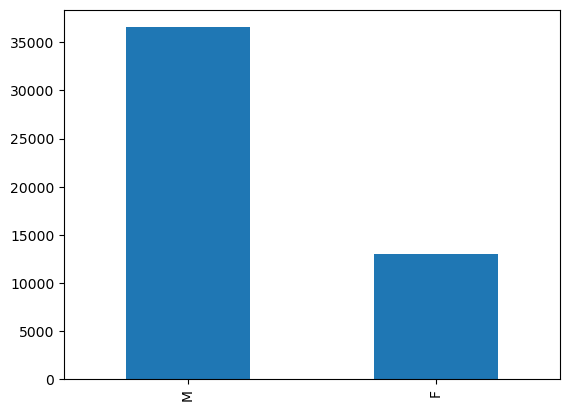

In [19]:
df.driver_gender.value_counts().plot.bar()

In [20]:
df.groupby('driver_gender').driver_age.agg(['min','max','mean'])

,min,max,mean
driver_gender,,,
F,15.0,84.0,32.300193
M,15.0,88.0,34.840902


In [25]:
#check drug activity for more male and female
drugs_data=pd.DataFrame(df.groupby('driver_gender').drugs_related_stop.value_counts())
drugs_data

drugs_related_stop
driver_gender drugs_related_stop                    
F             False                            12972
              True                                44
M             False                            36212
              True                               352

In [26]:
df.groupby('driver_gender').drugs_related_stop.sum()

driver_gender
F     44
M    352
Name: drugs_related_stop, dtype: object

In [27]:
df['drugs_related_stop'].value_counts()

False    52569
True       396
Name: drugs_related_stop, dtype: int64

In [28]:
df.groupby('stop_date').stop_outcome.value_counts()

stop_date  stop_outcome 
1/1/2006   Citation         15
           Arrest Driver     1
           Warning           1
1/1/2007   Citation         11
           No Action         1
                            ..
9/9/2009   Arrest Driver     1
9/9/2010   Citation         28
9/9/2011   Citation         19
           Warning           4
           N/D               1
Name: stop_outcome, Length: 4834, dtype: int64

In [32]:
new=df[df['stop_outcome']=='Warning']
new

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
99,10/3/2005,2023-07-30 08:37:00,NaN,M,1965.0,40.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
108,10/3/2005,2023-07-30 17:00:00,NaN,M,1961.0,44.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,30+ Min,False
168,10/6/2005,2023-07-30 06:30:00,NaN,M,1970.0,35.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
260,10/9/2005,2023-07-30 16:00:00,NaN,F,1978.0,27.0,Black,Registration Violation,Registration/plates,False,NaN,Warning,False,0-15 Min,False
281,10/10/2005,2023-07-30 12:05:00,NaN,F,0.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52778,9/27/2011,2023-07-30 01:28:00,NaN,M,1986.0,25.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
52862,9/30/2011,2023-07-30 13:33:00,NaN,M,1989.0,22.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
52915,10/3/2011,2023-07-30 00:53:00,NaN,F,1987.0,24.0,White,Suspicious Person,Other,False,NaN,Warning,False,0-15 Min,False
52916,10/3/2011,2023-07-30 02:46:00,NaN,M,1977.0,34.0,Hispanic,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False


In [33]:
new.groupby('driver_gender').stop_outcome.value_counts()

driver_gender  stop_outcome
F              Warning         297
M              Warning         851
Name: stop_outcome, dtype: int64

In [35]:
pd.crosstab(df['driver_gender'],df['violation'],margins=True)

violation,Equipment,Moving violation,Other,Registration/plates,Speeding,All
driver_gender,,,,,,
F,855,1390,354,504,9913,13016
M,3421,6995,2607,1316,22225,36564
All,4276,8385,2961,1820,32138,49580


<Axes: >

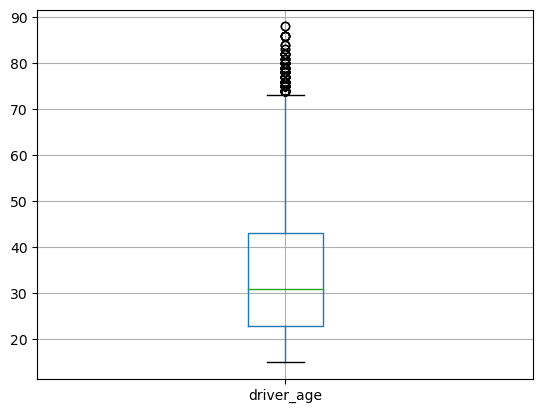

In [36]:
df.boxplot('driver_age')